# Interpolación

En el notebook anterior, vimos cómo se puede discretizar una función continua para calcular numéricamente una derivada.

Un problema muy común en el cómputo científico es el problema opuesto: tenemos datos discretos, y queremos encontrar una función continua que los aproxime. Una manera de hacer esto es la **interpolación**: 

> Dados datos $(x_i, y_i)$ para $i=1,\ldots,N$,  encontrar una función $f(x)$ que pase exactamente por los puntos, es decir, tal que $f(x_i) = y_i$ para cada $i$.

La interpolación provee, entre otras cosas, una manera de formalizar la derivación de diferencias finitas para calcular derivadas, y para llevar a cabo integrales de manera numérica. Mucho más allá, provee también una manera para manipular funciones de forma numérica.

Podríamos escoger distintas clases de función $f$ con las cuales interpolar. Aquí, trabajaremos con los **polinomios** y la llamada **interpolación de Lagrange**.

#### Ejercicio 1

El primer caso que tratar es con $N=2$, es decir encontrar una función que interpole entre los puntos $(x_1, y_1)$ y $(x_2, y_2)$. Es claro que basta utilizar una recta para hacerlo. Para encontrar cuál recta es, hacemos lo siguiente.

(i) Define una función $L_1(x)$ que es lineal en $x$, tal que $L_1(x)$ tome el valor $0$ en $x = x_2$, es decir, $L_1(x_2) = 0$. Ahora haz que también tome el valor $1$ en $x = x_1$, es decir, que $L_1(x_1) = 1$.

(ii) Por simetría, encuentra la función $L_2(x)$ tal que $L_2(x_1) = 0$ y $L_2(x_2) = 1$.

(iii) Utiliza $L_1$ y $L_2$ para encontrar un polinomio lineal que interpola los datos.

(iv) Impleméntalo.

(v) Toma dos puntos. Dibújalos y el polinomio lineal que los interpola.

In [53]:
#incisos del (i) al (iii)

Sea $L_{1}(x)$ una funcion lineal en $x$, definida de la siguiente manera: $$L_{1}(x)=\dfrac{x}{x_{1}-x_{2}}-\dfrac{x_{2}}{x_{1}-x_{2}} .$$

Observamos que la funcion propuesta cumple que $L_{1}(x_2)=0$ y $L_{1}(x_1)=1$.

Por simetria la funcion $L_2(x)$ se define como, $$L_{2}(x)=\dfrac{x}{x_{2}-x_{1}}-\dfrac{x_{1}}{x_{2}-x_{1}}$$

Para encontrar un polinomio lineal que interpole nuestros datos, podemos intentar una combinacion linea del tip0 

$$P(x)=\alpha L_1(x)+\beta L_2(x).$$

Utilizando las propiedades de nuestras funciones $L_1$ y $L_2$, podemos afirmar lo siguiente: 

$$P(x_1)=\alpha$$ y $$P(x_2)=\beta.$$

Ademas, para que nuestro polinomio funcione como interpolacion, tiene que cumplir lo siguiente,

$$P(x_1)=y_1$$ y $$P(x_2)=y_2.$$ Por lo tanto $$\alpha=y_1$$ y $$\beta=y_2$$

Entonces, el polinomio que buscamos es, 

$$P(x)=y_1 L_1(x)+y_2 L_2(x).$$ 

In [49]:
#(iv)
#esta funcion regresa un polinomio en SymPy
using SymPy
function interp(x1,y1,x2,y2)
    x=Sym("x")
    L1(x)=x/(x1-x2) - x2/(x1-x2)
    L2(x)=x/(x2-x1) - x1/(x2-x1)
    P(x)= y1*L1(x)+y2*L2(x)
    return P(x)
end

interp (generic function with 1 method)

In [50]:
#prueba para los puntos (0,0) y (1,1). regresa la identidad. 
interp(0,0,1,1)#interp(x1,y1,x2,y2) las primeras dos entradas corresponden a las coordenadas de un punto y las otras dos al otro

x

In [51]:
#(v)
using Plots
function graf(x1,y1,x2,y2)
    scatter([x1,x2],[y1,y2],xlimits=(0,10),label="puntos",ylimits=(0,10))
    plot!(interp(x1,y1,x2,y2),label="Polinomio")
end

graf (generic function with 1 method)

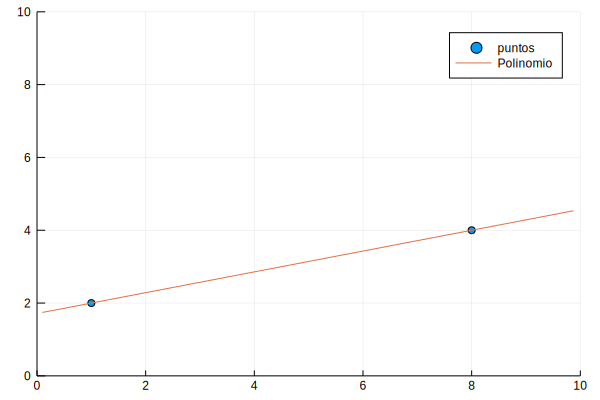

In [52]:
#Prueba para los puntos (1,2) y (8,4).
graf(1,2,8,4)

#### Ejercicio 2

Hagamos lo mismo con tres puntos:

(i) Encuentra un polinomio $L_1(x)$ sencillo, tal que $L(x)$ sea igual a $0$ para $x=x_2$ y $x=x_3$. Ahora normalízalo para que $L_1(x_1) = 1$. ¿De qué grado es el polinomio?

(ii) De manera similar, encuentra $L_i(x)$ que sea igual a $1$ en $x_i$, y que se anule en $x_j$ para $j \neq i$, para $i=2, 3$.

(iii) Implementa estas funciones como una función `L(i, x)` que toma $i$ y $x$ como argumentos y  calcule la función $L_i$ evaluada en el punto $x$. 

(iv) Calcula la función $L(x)$ que interpola los tres puntos simultáneamente, basado en las funciones $L_i$ que acabas de encontrar. ¿Qué tipo de polinomio es?

(v) Escoge 3 puntos $(x_i, y_i)$. Dibújalos y dibuja la función $L$ que los interpola.


In [54]:
#Incisos (i) y (ii)

Basandonos en el ejercicio 1, sea $L_1(x)=m(x-x_2)(x-x_3)$, entonces $L_1(x_1)=m(x_1-x_2)(x_1-x_3)=1$. Por lo que $m=\dfrac{1}{(x_1-x_2)(x_1-x_3)}$. Por lo tanto $L_1(x)=\dfrac{(x-x_2)(x-x_3)}{(x_1-x_2)(x_1-x_3)}.$

Analogamente para $L_2(x)$ y para $L_3(x)$ tenemos que,  $$L_2(x)=\dfrac{(x-x_1)(x-x_3)}{(x_2-x_1)(x_2-x_3)}$$  y  $$L_3(x)=\dfrac{(x-x_1)(x-x_2)}{(x_3-x_1)(x_3-x_2)}.$$

In [69]:
#(iii)

In [70]:
function l1(x,x1,x2,x3)
    return((x-x3)*(x-x2))/((x1-x3)*(x1-x2))
end
function l2(x,x1,x2,x3)
    return((x-x3)*(x-x1))/((x2-x3)*(x2-x1))
end
function l3(x,x1,x2,x3)
    return((x-x1)*(x-x2))/((x3-x1)*(x3-x2))
end

l3 (generic function with 1 method)

In [71]:
function L(i,x,xv)
 G=[l1(x,xv[1],xv[2],xv[3]),l2(x,xv[1],xv[2],xv[3]),l3(x,xv[1],xv[2],xv[3])]
 return G[i]
end

L (generic function with 1 method)

In [72]:
y1=[1,2,5]
L(3,1,y1)

0.0

In [74]:
#(iv)

In [ ]:
Sera un polinomio de segundo grado. 

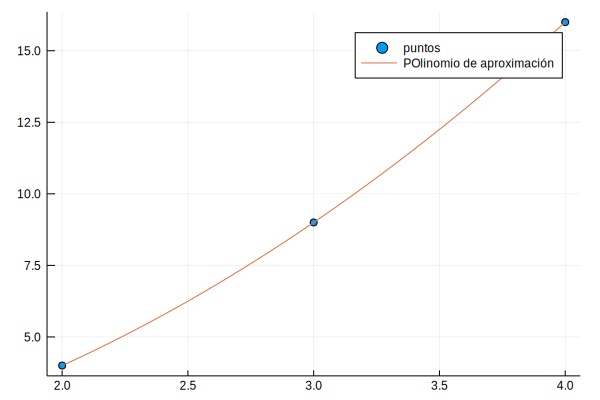

In [73]:
#(v)
function LF(s,x,y)
    lol=0
    for i in 1:length(x)
        lol=y[i]*L(i,s,x)+lol
end
return lol
end
x=[2,3,4]
y=[4,9,16]
vect=[]
ejex=[]
for i in 2:0.01:4
push!(vect,LF(i,x,y))
    push!(ejex,i)
end

scatter(x,y,label=("puntos "))
plot!(ejex,vect,label=("POlinomio de aproximación"))

#### Ejercicio 3

Ahora generalicemos esto a $N$ puntos:

(i) Encuentra un polinomio $L_1(x)$ sencillo, tal que $L(x)$ sea igual a $0$ para $x=x_2$, $x=x_3$, \ldots, $x=x_N$. Ahora normalízalo para que $L_1(x_1) = 1$. ¿De qué grado es el polinomio?

(ii) De manera similar, encuentra $L_i(x)$ que sea igual a $1$ en $x_i$, y que se anule en $x_j$ para $j \neq i$.

(iii) Implementa estas funciones como una función `L(i, x)` que toma $i$ y $x$ como argumentos y  calcule la función $L_i$ evaluada en el punto $x$. 

(iv) Dibuja algunas $L_i$ como función de $x$ para $N$ chiquitas. Asegúrate de que sí se comporten correctamente, es decir que sí tomen los valores $1$ y $0$ en donde deben.

In [ ]:
#(i)

El polinomio $L_1(x)$ es,
$$
L_1(x) = \gamma _1\prod _{\substack{j=1\\ j\neq 1}} ^n (x - x_j)
$$
aplicando la condicion de normalizacion, 
$$
L_1(x_1) = \gamma_1\prod _{\substack{j=1\\ j\neq 1}} ^n (x_1 - x_j) = 1\\
\Rightarrow \gamma_1 = \dfrac{1}{\prod _{\substack{j=1\\ j\neq 1}} ^n (x_1 - x_j)}$$

El polinomio resultante sera de grado $n-1$

In [75]:
#(ii)

La función que generaliza el procedimiento esta dada por,
$$
l_i(x) = \gamma _i\prod _{\substack{j=1\\ j\neq i}} ^n (x - x_j)
$$
Si se quiere que $l_i(x)$ esté normalizado, entonces
$$
l_i(x_i) = \gamma_i\prod _{\substack{j=1\\ j\neq i}} ^n (x_i - x_j) = 1\\
\Rightarrow \gamma_i = \dfrac{1}{\prod _{\substack{j=1\\ j\neq i}} ^n (x_i - x_j)}
$$

In [ ]:
#(iii)

In [77]:
function l(x0,j,x)
     pol=1
    for i in 1:length(x)
       
        if i != j
            pol*=(x0-x[i])/(x[j]-x[i])
        end
end
            return pol
end

l (generic function with 1 method)

In [78]:
s=[1,2,3]
v=[1,4,9]
l(3,2,s)

-0.0

In [79]:
function L(x0,x,y)
    n=length(x)
    L=0
    for i in 1:n
      L=L+y[i]*l(x0,i,x)
    end
    return L
        
end

L (generic function with 1 method)

In [ ]:
#(iv)

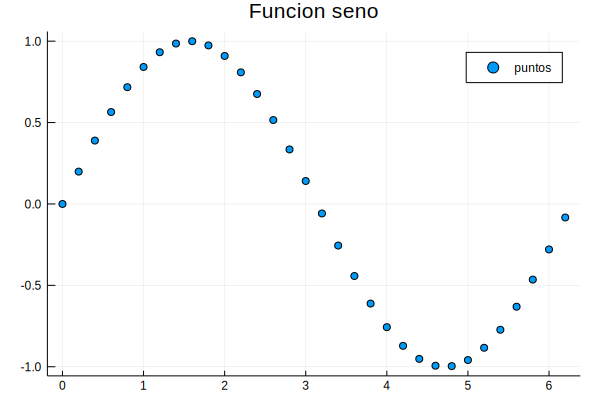

In [83]:
x1=[]
y1=[]
for i in 0:0.2:6.3
 push!(x1,i)
 push!(y1,sin(i))
end
scatter(x1,y1,title=("Funcion seno"),label=("puntos"))

In [84]:
vect1=[]
ejex1=[]
for i in 0:0.01:6.3
push!(vect1,L(i,x1,y1))
 push!(ejex1 ,i)  
end

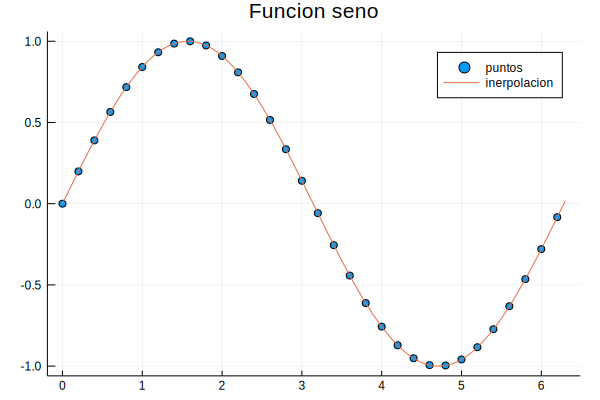

In [85]:
plot!(ejex1,vect1,label=("interpolacion"))

#### Ejercicio 4

(i) Utiliza las $L_i$ que encontraste en el ejercicio 2 para interpolar los datos $(x_i, y_i)_{i=1}^N$ con un polinomio $p$. ¿De qué orden es el polinomio resultante? Nota que $p$ es *único* en el conjunto de polinomios con grado $\le$ el grado de $p$.

(ii) Escribe una función `interpolar` que acepta un vector `x` de las $x_i$ y otro vector `y` de las $y_i$, y regresa *una función* que las interpole. [Pista: Puedes definir la función adentro de la función `interpolar` y regresar esta misma función.]

(iii) Toma funciones polinomiales de orden $n$ diferentes, y genera $n+1$ datos al *muestrear* (es decir, evaluar) la función en distintos puntos $x_i$, espaciados de forma uniforme. Dibuja la función original y la función interpolada en estos puntos.

(iv) Intenta interpolar la función $\sin(x)$. ¿Funciona bien?

In [86]:
#(ii)

In [87]:
function interpolar(x,y)

 function L(p)
        aux = [l(p, i, x) for i in 1:length(y)]
        return dot(aux, y)
    end
    return L     
end

interpolar (generic function with 1 method)

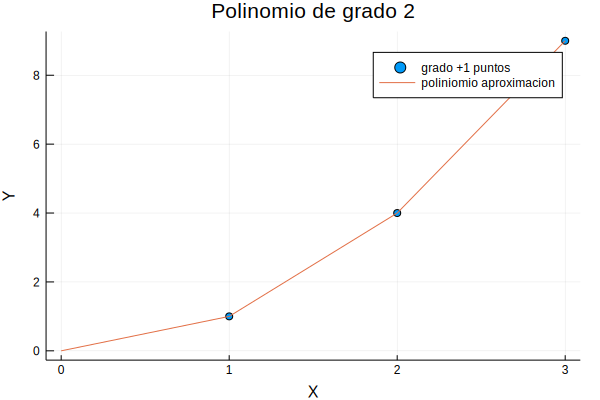

In [88]:
#(iii)
u=[]
v=[]
gr=2#grado del polinomio
for i in 1:gr+1
    push!(u,i)
    push!(v,i^gr)
end
polinomio=interpolar(u,v)
scatter(u,v,title=("Polinomio de grado 2"), xlabel=("X"), ylabel=("Y"), label=("grado +1 puntos"))
plot!(polinomio,0:length(v), label=("poliniomio aproximacion"))

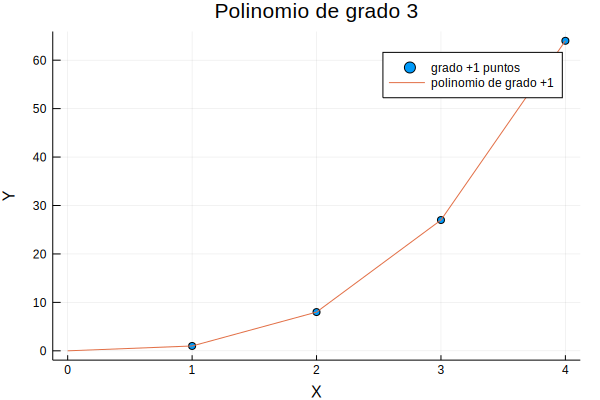

In [89]:
u=[]
v=[]
gr=3#grado del polinomio
for i in 1:gr+1
    push!(u,i)
    push!(v,i^gr)
end
polinomio=interpolar(u,v)
scatter(u,v,title=("Polinomio de grado 3"), xlabel=("X"), ylabel=("Y"), label=("grado +1 puntos"))
plot!(polinomio,0:length(v), label=("polinomio de grado +1"))

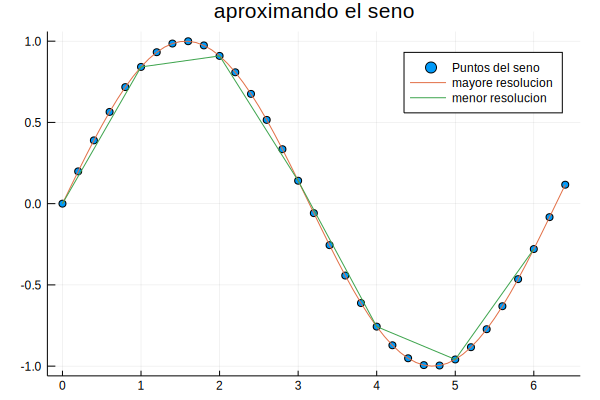

In [90]:
#(iv)
u=[]
v=[]
for i in 0:0.2:6.4
    push!(u,i)
    push!(v,sin(i))
end
polinomio=interpolar(u,v)
scatter(u,v, title=("aproximando el seno"),label=("Puntos del seno"))
plot!(polinomio, 0:0.1:6.4, label=("mayore resolucion"))
plot!(polinomio, 0:6.4, label=("menor resolucion"))

#### Ejercicio 5

Considera la función de Runge, $f(x) = \frac{1}{1+25x^2}$, en la región $x \in [-1, 1]$. Interpólala con tu función `interpolar` para distintos números $N$ de puntos. ¿Qué observas? Utiliza `@manipulate` para variar el número de puntos muestreados / grado del polinomio interpolador.

In [91]:
x=Sym("x")
runge=x->1/(1+25*x^2)

runge(0)

1.0

In [93]:
using Interact
u=[]
v=[]
@manipulate for n in 1:20#, p in 0.1:0.01:1

    for i in -1:2/n:1
    push!(u,i)
    push!(v,runge(i))
end
polinomio=interpolar(u,v)
scatter(u,v)
plot!(polinomio, label=("aproximación"))#,-1:0.01:1
end

INFO: Recompiling stale cache file /home/hectormorales/.julia/lib/v0.6/Interact.ji for module Interact.


HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/2b6758317c30db80b0ae6e5c8bcb509a88627beb-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/2b6758317c30db80b0ae6e5c8bcb509a88627beb-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_02", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-b03792de-6343-4c8a-a322-46d27e7f5115", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["n"], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:max, 20),Pair{Symbol,Any}(:min, 1),Pair{Symbol,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Symbol,Any}(:step, 1),Pair{Symbol,Any}(:className, "slider slider is-fullwidth"),Pair{Symbol,Any}(:style, Dict{Any,Any}())), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Int64}("ob_01", 10, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/home/hectormorales/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/home/hectormorales/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/home/hectormorales/.julia/v0.6/InteractBase/src/../assets/all.js", "/home/hectormorales/.julia/v0.6/InteractBase/src/../assets/style.css", "/home/hectormorales/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":10}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.co

## Interpolación en puntos espaciados no-uniformemente

Le que acabas de observar se llama el **fenómeno de Runge**. Esto demuestra que en general *es una mala idea* interpolar en puntos uniformemente espaciados. Sin embargo, resulta que el problema no es la interpolación en sí, sino la elección de puntos en donde interpolar: una solución es el tomar puntos en el intervalo $[-1,1]$, espaciados tales que se amontonen cerca de los puntos extremos del intervalo. [La razón por esto se puede entender con la teoría de potenciales ("potential theory"); ver e.g. Trefethen, *Approximation Theory and Approximation Practice*.] 

Lo más común es utilizar los llamados **puntos de Chebyshev** con parámetro $n$, definidos como 

$$x_j := \cos \left( \frac{j \pi}{n} \right) \quad \text{con } 0 \le j \le n.$$

#### Ejercicio 6

(i) Escribe una función que calcula los puntos de Chebyshev para un valor de $n$ dado.

(ii) Escribe una función que interpola una función dada en los puntos de Chebyshev. Grafica los resultados.

(iii) Interpola la función de Runge con puntos de Chebyshev. ¿Qué observas?

In [94]:
#(i)

In [95]:
function chebyshev(n)
    x=[]
    
    for i in 0:n
      
        push!(x,cos((i*pi)/n))
    end
    return x
end

chebyshev (generic function with 1 method)

In [96]:
#(ii)

In [97]:
function inter_cheb(f,n)
     x=chebyshev(n)
     y=f.(x)
    S=interpolar(x,y)
    return S
   
end   

inter_cheb (generic function with 1 method)

In [98]:
#(iii)

In [99]:
g(x)=1/(1+25*x^2)
@manipulate for n in 1:30
    x = chebyshev(n)
    y = g.(x)
    s=inter_cheb(g,n)
    scatter(x, y, xlims=[-1,1], label=("los puntos"), xlabel=("x"),ylabel=("y"))
    plot!(g, label=("la funcion de runge"))
    plot!(s,label=("la aproximacion"))
end

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_08", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-21082feb-6b6d-42d2-a74b-fddf381b9bbb", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["n"], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:max, 30),Pair{Symbol,Any}(:min, 1),Pair{Symbol,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Symbol,Any}(:step, 1),Pair{Symbol,Any}(:className, "slider slider is-fullwidth"),Pair{Symbol,Any}(:style, Dict{Any,Any}())), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Int64}("ob_07", 15, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/home/hectormorales/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/home/hectormorales/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/home/hectormorales/.julia/v0.6/InteractBase/src/../assets/all.js", "/home/hectormorales/.julia/v0.6/InteractBase/src/../assets/style.css", "/home/hectormorales/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":15}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.co

#### Ejercicio 7

(i) Dada una función $f$, calcula numéricamente el error al utilizar la interpolación de Chebyshev $p$ con respecto a la función original $f$, dado por la norma

$$\|f - p\|_{\infty} := \sup_x |f(x) - p(x)|,$$

para distintos números de puntos de Chebyshev.

(ii) Conforme se aumenta el número de puntos, ¿cómo es la convergencia a $0$ del error?  

In [ ]:
#(i)

In [100]:
function error_cheb(f,n,d)
    interpola = inter_cheb(f, n)
    norma = maximum(abs.(f.(d) - interpola.(d)))
    return norma
end

error_cheb (generic function with 1 method)

In [ ]:
#(ii)

In [101]:
@manipulate for n in 1:20
error_cheb(x->x^2,n,0)
end

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_14", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-28e5a594-cf08-4e02-836d-b2ac27786208", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["n"], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:max, 20),Pair{Symbol,Any}(:min, 1),Pair{Symbol,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Symbol,Any}(:step, 1),Pair{Symbol,Any}(:className, "slider slider is-fullwidth"),Pair{Symbol,Any}(:style, Dict{Any,Any}())), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Int64}("ob_13", 10, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/home/hectormorales/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/home/hectormorales/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/home/hectormorales/.julia/v0.6/InteractBase/src/../assets/all.js", "/home/hectormorales/.julia/v0.6/InteractBase/src/../assets/style.css", "/home/hectormorales/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":10}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.co

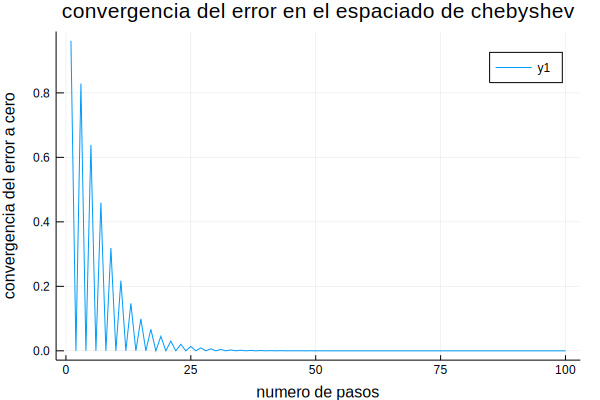

In [102]:
vx=[]
for i in 1:100
    push!(vx, error_cheb(g,i,0))
end
plot(vx,title=("convergencia del error en el espaciado de chebyshev") ,ylabel=("convergencia del error a cero"), xlabel=("numero de pasos"))

#### Ejercicio 8

Resulta que la tasa de convergencia depende de qué tan suave sea la función.
Por ejemplo, inténtalo con la función `abs` y con la función `floor`.

In [103]:
@manipulate for j=1:30
   
    error_cheb(runge,j,-1:1)
end

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_20", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-1f77f51b-c72f-4241-b923-aea01f37e258", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["j"], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:max, 30),Pair{Symbol,Any}(:min, 1),Pair{Symbol,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Symbol,Any}(:step, 1),Pair{Symbol,Any}(:className, "slider slider is-fullwidth"),Pair{Symbol,Any}(:style, Dict{Any,Any}())), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Int64}("ob_19", 15, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/home/hectormorales/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/home/hectormorales/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/home/hectormorales/.julia/v0.6/InteractBase/src/../assets/all.js", "/home/hectormorales/.julia/v0.6/InteractBase/src/../assets/style.css", "/home/hectormorales/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":15}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.co

In [105]:
@manipulate for j=1:30
   
    error_cheb(abs,j,-1:1)
end

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_26", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-041f3e68-8f0f-479c-94a5-2593d43120cc", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["j"], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:max, 30),Pair{Symbol,Any}(:min, 1),Pair{Symbol,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Symbol,Any}(:step, 1),Pair{Symbol,Any}(:className, "slider slider is-fullwidth"),Pair{Symbol,Any}(:style, Dict{Any,Any}())), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Int64}("ob_25", 15, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/home/hectormorales/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/home/hectormorales/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/home/hectormorales/.julia/v0.6/InteractBase/src/../assets/all.js", "/home/hectormorales/.julia/v0.6/InteractBase/src/../assets/style.css", "/home/hectormorales/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":15}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.co

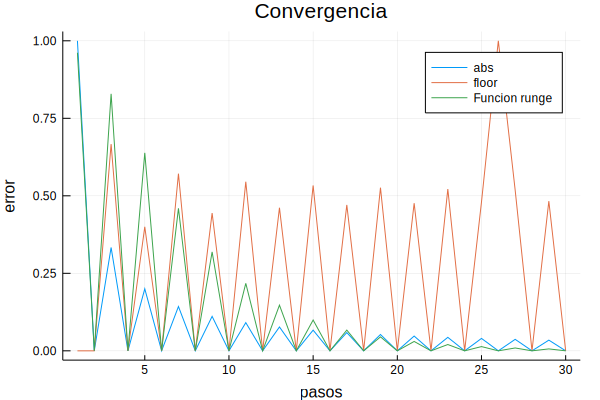

In [104]:
vx1=[]
for i in 1:30
    push!(vx1, error_cheb(abs,i,-1:1))
end
vx2=[]
for i in 1:30
    push!(vx2, error_cheb(floor,i,-1:1))
end
vx3=[]
for i in 1:30
    push!(vx3, error_cheb(runge,i,-1:1))
end
plot(vx1,title=("Convergencia "),xlabel=("pasos"),ylabel=("error"), label=("abs"))
plot!(vx2,label=("floor"))
plot!(vx3,label=("Funcion runge"))

## Hacia el futuro

Lo que hemos logrado es reemplazar (aproximar) una función continua $f$ por un conjunto discreto de sus valores $f(x_i)$ en la **malla** $(x_i)_{i=1}^N$. Ahora podremos manipular la función ¡al manipular sólo estos valores discretos!

Resulta que es más útil cambiar de punto de vista, y utilizar la llamada [**interpolación baricéntrica**](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf).

Luego llevamos a cabo un **cambio de base** en el espacio de polinomios, y utilizamos los **polinomios de Chebyshev** en lugar de los polinomios basados en $x^i$.

La idea es escribir el polinomio interpolante como una suma de polinomios de Chebyshev y examinar los coeficientes de estos polinomios, que tienen propiedades muy útiles. Esto lo podremos ver hasta después de ver álgebra lineal numérica.  ¡Podría formar un proyecto final interesante!  